In [1]:
from dis import dis
from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\acer\AppData\Local\Temp\ipykernel_24776\4271784750.py:2: DeprecationWarning: The Tix Tk extension is unmaintained, and the tkinter.tix wrapper module is deprecated in favor of tkinter.ttk
  from tkinter.tix import AUTO


In [2]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed20", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified20.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [3]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified20.csv")
data.head()
target=data['target']
data=data.drop(['target'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)
#printing all the attributes
for i in data.columns:
    print(i)
data.head()

(23178, 166)
(23178,)
dist_0_1
dist_2_1
dist_3_1
dist_4_1
dist_5_1
dist_6_1
dist_7_1
dist_8_1
dist_9_1
dist_10_1
dist_11_1
dist_12_1
dist_13_1
dist_14_1
dist_15_1
dist_16_1
dist_17_1
dist_18_1
dist_19_1
dist_20_1
dist_21_1
dist_22_1
dist_23_1
dist_24_1
dist_2_13
dist_3_13
dist_4_13
dist_5_13
dist_6_13
dist_7_13
dist_8_13
dist_9_13
dist_10_13
dist_11_13
dist_12_13
dist_14_13
dist_15_13
dist_16_13
dist_17_13
dist_18_13
dist_19_13
dist_20_13
dist_21_13
dist_22_13
dist_23_13
dist_24_13
dist_2_11
dist_3_11
dist_4_11
dist_5_11
dist_6_11
dist_7_11
dist_8_11
dist_9_11
dist_10_11
dist_2_9
dist_3_9
dist_4_9
dist_5_9
dist_6_9
dist_7_9
dist_8_9
dist_14_23
dist_15_23
dist_16_23
dist_17_23
dist_18_23
dist_19_23
dist_20_23
dist_21_23
dist_22_23
dist_14_21
dist_15_21
dist_16_21
dist_17_21
dist_18_21
dist_19_21
dist_20_21
dist_22_21
dist_23_21
dist_14_19
dist_15_19
dist_16_19
dist_17_19
dist_18_19
dist_14_18
dist_15_18
dist_16_18
dist_17_18
dist_14_17
dist_15_17
dist_16_17
dist_14_24
dist_15_24
dist_16

,dist_0_1,dist_2_1,dist_3_1,dist_4_1,dist_5_1,dist_6_1,dist_7_1,dist_8_1,dist_9_1,dist_10_1,...,right_shoulder_pitch,right_shoulder_roll,right_elbow_yaw,right_elbow_roll,left_hip_pitch,left_hip_roll,left_knee_pitch,right_hip_pitch,right_hip_roll,right_knee_pitch
0,0.317927,0.306824,0.462448,0.256851,0.225721,0.390506,0.430828,0.250860,0.210222,0.386648,...,1.614270,-0.147442,1.296214,0.211502,0.157114,-0.009114,0.106628,0.088090,0.029938,0.127583
1,0.317900,0.306921,0.462843,0.257746,0.226861,0.390761,0.429716,0.250959,0.208816,0.387489,...,1.619788,-0.148863,1.306293,0.224825,0.156264,-0.002401,0.115748,0.079567,0.029953,0.126045
2,0.317875,0.306955,0.462978,0.258207,0.227288,0.390933,0.429376,0.251039,0.208184,0.387753,...,1.619716,-0.148812,1.302433,0.224631,0.155941,-0.001148,0.116238,0.078291,0.030147,0.125562
3,0.317861,0.306944,0.462944,0.258325,0.227239,0.390980,0.429352,0.251119,0.208042,0.387646,...,1.619620,-0.149545,1.296863,0.226248,0.155132,-0.000888,0.115037,0.077394,0.030157,0.125631
4,0.317845,0.306932,0.462877,0.258298,0.227155,0.390974,0.429358,0.251210,0.208079,0.387484,...,1.616926,-0.149889,1.276580,0.231540,0.154745,-0.000186,0.114142,0.076693,0.030472,0.125633


In [5]:
data.shape

(23178, 166)

In [6]:
from sklearn.ensemble import RandomForestClassifier
# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=342)

# fit the model to start training.

model.fit(data, target)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.

final_df = pd.DataFrame({"Features": pd.DataFrame(data).columns, "Importances":importances})
final_df.set_index("Importances")

# sort in ascending order to better visualization.
final_df =final_df.sort_values('Importances')
plt.figure(figsize=(30,25))




<Figure size 3000x2500 with 0 Axes>

<Figure size 3000x2500 with 0 Axes>

([<matplotlib.axis.XTick at 0x23dc0aab0a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

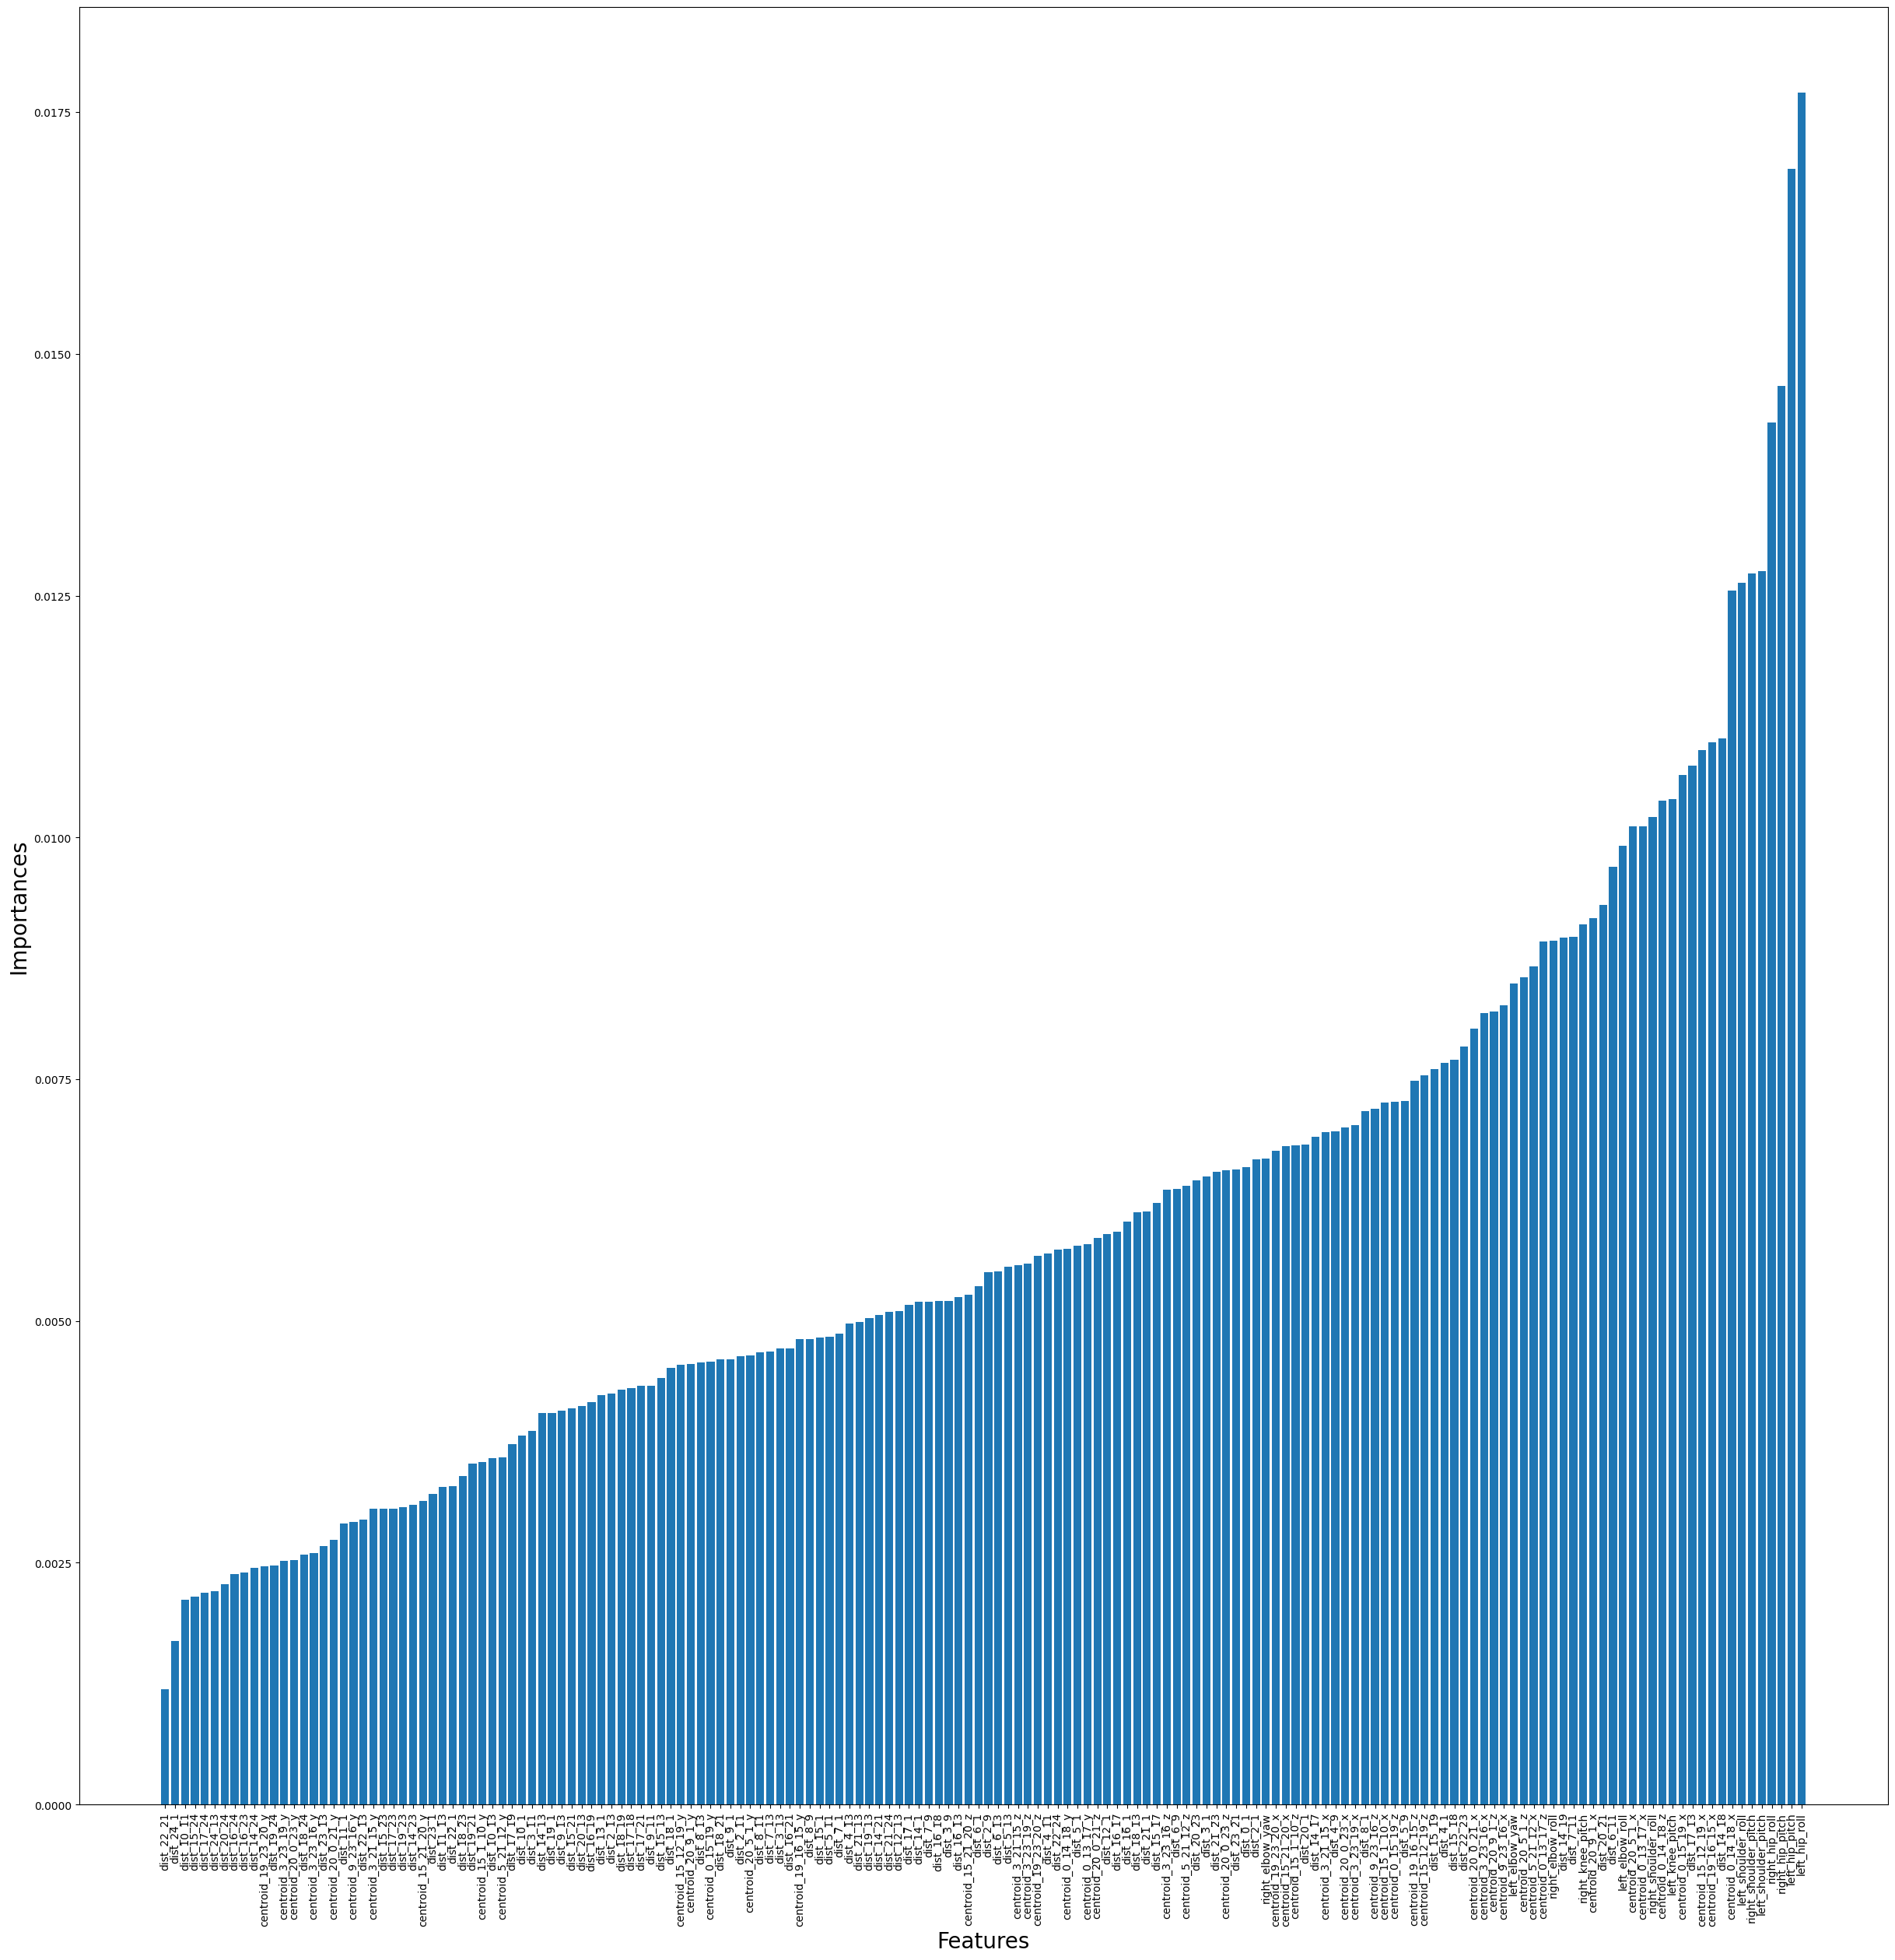

In [7]:
# print(final_df)
plt.figure(figsize=(30,30))
plt.xlabel('Features',size=20)
plt.ylabel('Importances',size=20)
plt.bar(final_df['Features'],final_df['Importances'],label="Importance")
plt.xticks(final_df['Features'],rotation='vertical')

In [8]:
x=list(final_df['Features'])
y=list(final_df['Importances'])
y1=[]
x1=[]
sorted_id=[]
for i in range(-26,0):
    x[i]=str(x[i])
    sorted_id.append(x[i])
    y1.append(y[i])
x1=sorted_id

data=data[sorted_id] 
data.head()
data.columns

Index(['right_elbow_roll', 'dist_14_19', 'dist_7_11', 'right_knee_pitch',
       'centroid_20_9_1_x', 'dist_20_21', 'dist_6_11', 'left_elbow_roll',
       'centroid_20_5_1_x', 'centroid_0_13_17_x', 'right_shoulder_roll',
       'centroid_0_14_18_z', 'left_knee_pitch', 'centroid_0_15_19_x',
       'dist_17_13', 'centroid_15_12_19_x', 'centroid_19_16_15_x',
       'dist_14_18', 'centroid_0_14_18_x', 'left_shoulder_roll',
       'right_shoulder_pitch', 'left_shoulder_pitch', 'right_hip_roll',
       'right_hip_pitch', 'left_hip_pitch', 'left_hip_roll'],
      dtype='object')

([<matplotlib.axis.XTick at 0x23dc7454b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

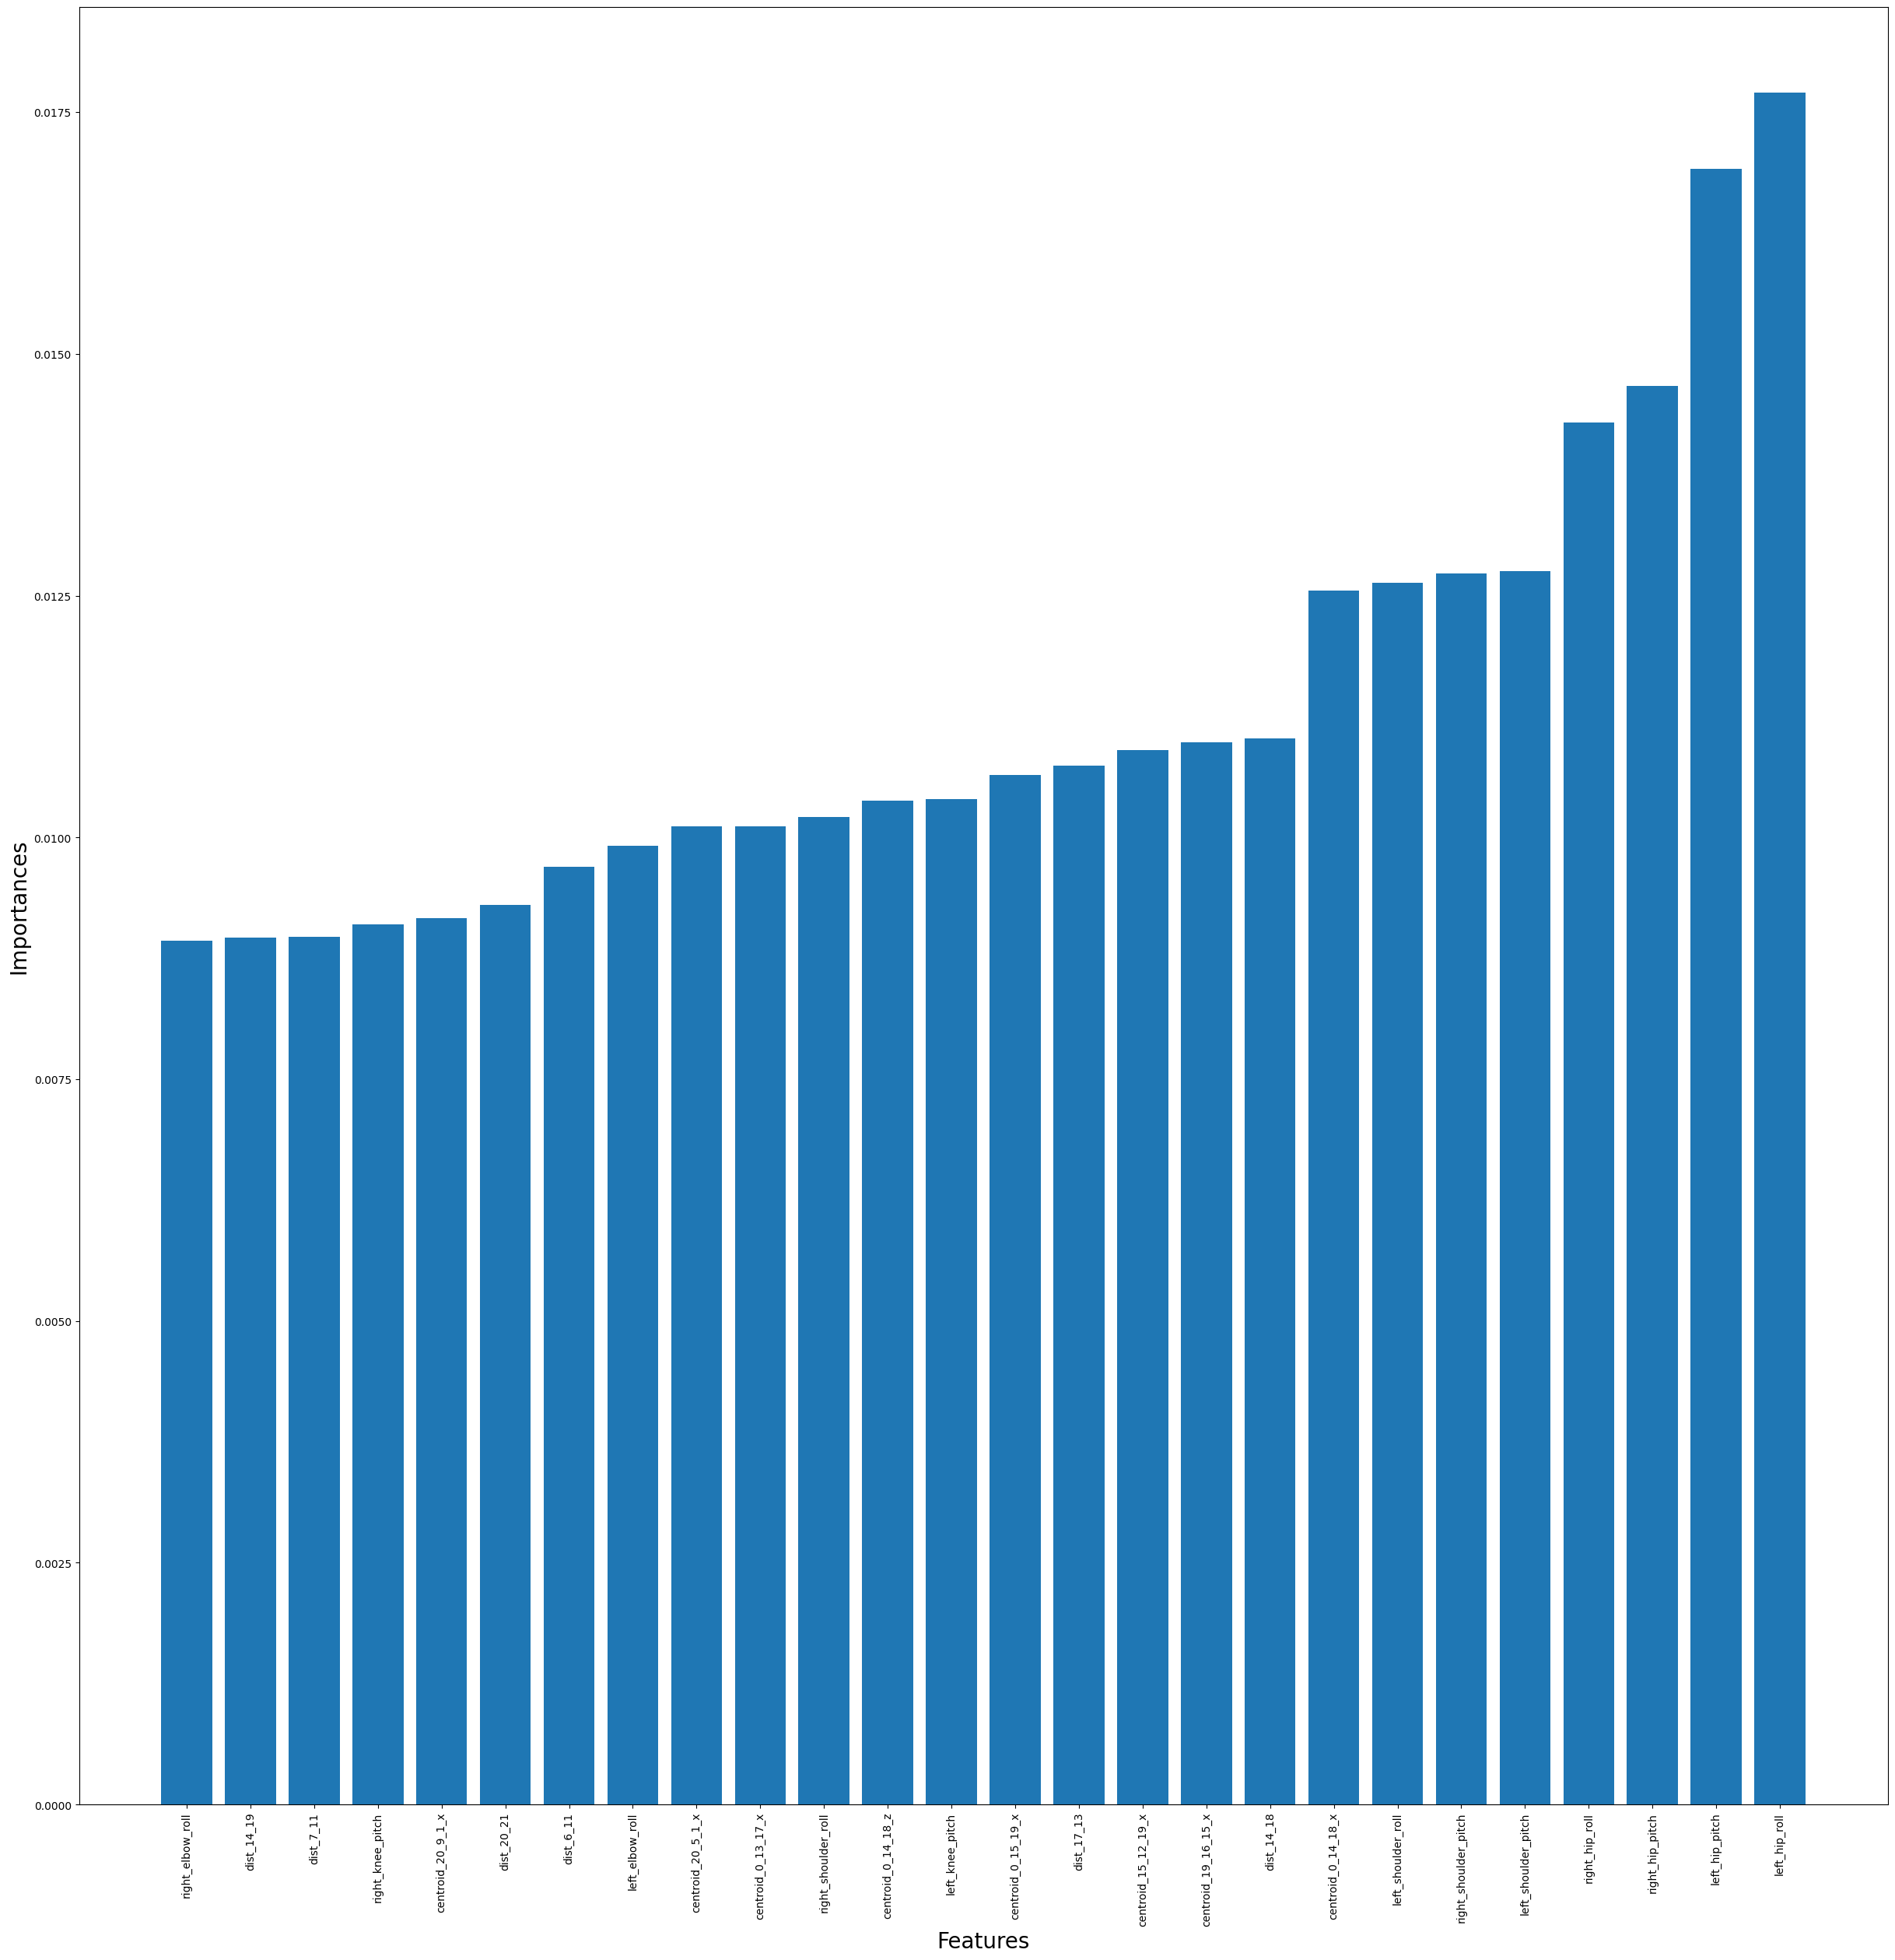

In [9]:
# print(final_df)
plt.figure(figsize=(30,30))
plt.xlabel('Features',size=20)
plt.ylabel('Importances',size=20)
plt.bar(x1,y1,label="Importance")
plt.xticks(x1,rotation='vertical')

In [10]:
# len1=data.shape[1]
# l1=list(range(0,len1))
# l2=[]
# for i in l1:
#     i=str(i)
#     l2.append(i)
# l1=l2
    
# data.columns=l1
# data.head()
data['target']=target
data.head()


,right_elbow_roll,dist_14_19,dist_7_11,right_knee_pitch,centroid_20_9_1_x,dist_20_21,dist_6_11,left_elbow_roll,centroid_20_5_1_x,centroid_0_13_17_x,...,dist_14_18,centroid_0_14_18_x,left_shoulder_roll,right_shoulder_pitch,left_shoulder_pitch,right_hip_roll,right_hip_pitch,left_hip_pitch,left_hip_roll,target
0,0.211502,0.192068,0.401379,0.127583,0.213560,0.713016,0.429093,-0.288412,0.075832,0.140682,...,0.141112,0.130168,0.161124,1.614270,1.632925,0.029938,0.088090,0.157114,-0.009114,0
1,0.224825,0.187854,0.375431,0.126045,0.212033,0.719172,0.402493,-0.288063,0.075114,0.138257,...,0.142601,0.130076,0.153572,1.619788,1.627664,0.029953,0.079567,0.156264,-0.002401,0
2,0.224631,0.187105,0.364729,0.125562,0.211317,0.721503,0.391051,-0.288264,0.074710,0.137128,...,0.142996,0.129787,0.153380,1.619716,1.626473,0.030147,0.078291,0.155941,-0.001148,0
3,0.226248,0.187841,0.362702,0.125631,0.211077,0.721524,0.388213,-0.286949,0.074501,0.136775,...,0.142689,0.129464,0.153946,1.619620,1.624955,0.030157,0.077394,0.155132,-0.000888,0
4,0.231540,0.188188,0.363449,0.125633,0.211007,0.720942,0.388466,-0.292320,0.074386,0.136682,...,0.142345,0.129267,0.154640,1.616926,1.620111,0.030472,0.076693,0.154745,-0.000186,0


In [1]:
# len1=data.shape[1]
# l1=list(range(0,len1))
# l2=[]
# for i in l1:
#     i=str(i)
#     l2.append(i)
# l1=l2
    
# data.columns=l1
# data.head()

In [11]:
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\random_tree_classifier_extracted_modified20.csv",index=False)

In [12]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :26], sequences[end_ix-1, 26:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [18]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\random_tree_classifier_extracted_modified20.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]
data=pd.get_dummies(data,columns=['target'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,26)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(20, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
print(y_train)
print(y_train.shape)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

(23178, 46)
(18538, 6, 26)
(18538, 20)
<class 'numpy.ndarray'>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             5056      
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout_1 (Dropout)         (None, 2, 64)             0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               65

In [24]:
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

Confusion matrix
 [[240   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  7 218   0   0   0   0   1   0   0   0   0   0   0   0   0   0   2   0
    0   0]
 [  4   5 220   2   0   0   2   1   9   0   1   0   0   0   0   2   2   0
    0   0]
 [  1   4  21 222   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  10   0   7 219   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0]
 [  1   0   0   0   0 228   2   0   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0   0 231   0   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1 193   7   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   1   0  18 210   0   0   0   0   0   0   2   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   9 235   2   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   3   0   0   9   1 251   0   0   0   0   0   0   0
    0   0]
 [  1   0   0   0   0   9   0   0  10   0   0 1

In [25]:

print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)

specificity:
0   0.9795918367346939
1   0.9646017699115044
2   0.9053497942386831
3   0.891566265060241
4   0.9279661016949152
5   0.987012987012987
6   0.9914163090128756
7   0.9601990049751243
8   0.9170305676855895
9   0.9631147540983607
specificity avg
 0.9487849390424976


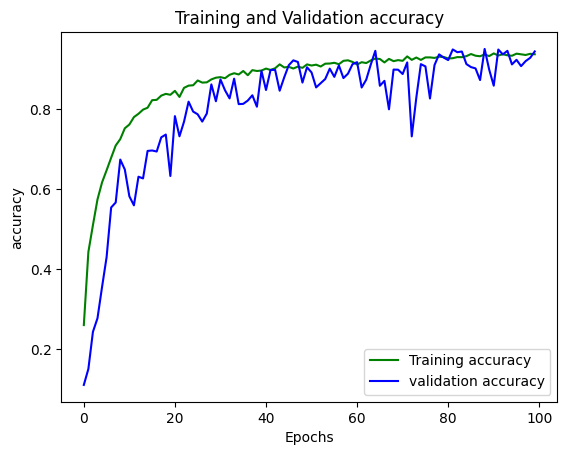

In [26]:
acc_train = history.history["accuracy"]
acc_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

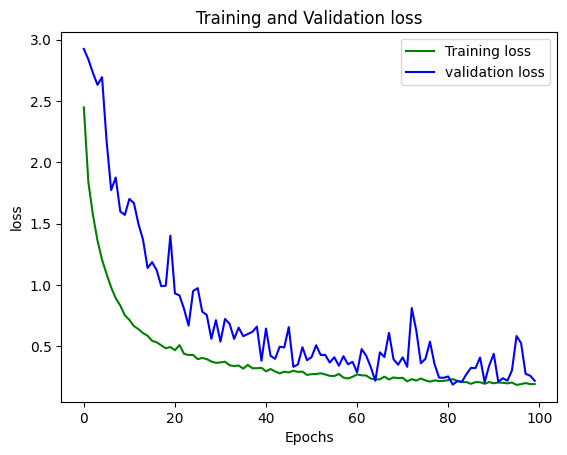

In [28]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()